In [67]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [68]:
df = pd.read_csv('~/Desktop/googleflu 1.csv')
df.head()

,Date,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,"Salt Lake City, UT","Arlington, VA","Norfolk, VA","Reston, VA","Richmond, VA","Bellevue, WA","Seattle, WA","Spokane, WA","Madison, WI","Milwaukee, WI"
0,2003-09-28,902,477,NaN,606,NaN,929,233,223,NaN,...,261,1066,948,NaN,1035,NaN,668,NaN,622,452
1,2003-10-05,952,501,NaN,663,NaN,849,251,243,NaN,...,249,1249,963,NaN,1135,NaN,787,NaN,626,449
2,2003-10-12,1092,492,NaN,700,NaN,1032,283,261,NaN,...,295,1289,970,NaN,1170,NaN,994,NaN,661,437
3,2003-10-19,1209,533,NaN,819,NaN,1084,310,268,NaN,...,292,1308,1011,NaN,1342,NaN,999,NaN,649,487
4,2003-10-26,1249,594,NaN,959,NaN,989,344,334,NaN,...,328,1426,1009,NaN,1354,NaN,1297,NaN,657,499


In [69]:
df['ds']=pd.to_datetime(df['Date'])
df.head()

,Date,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,"Arlington, VA","Norfolk, VA","Reston, VA","Richmond, VA","Bellevue, WA","Seattle, WA","Spokane, WA","Madison, WI","Milwaukee, WI",ds
0,2003-09-28,902,477,NaN,606,NaN,929,233,223,NaN,...,1066,948,NaN,1035,NaN,668,NaN,622,452,2003-09-28
1,2003-10-05,952,501,NaN,663,NaN,849,251,243,NaN,...,1249,963,NaN,1135,NaN,787,NaN,626,449,2003-10-05
2,2003-10-12,1092,492,NaN,700,NaN,1032,283,261,NaN,...,1289,970,NaN,1170,NaN,994,NaN,661,437,2003-10-12
3,2003-10-19,1209,533,NaN,819,NaN,1084,310,268,NaN,...,1308,1011,NaN,1342,NaN,999,NaN,649,487,2003-10-19
4,2003-10-26,1249,594,NaN,959,NaN,989,344,334,NaN,...,1426,1009,NaN,1354,NaN,1297,NaN,657,499,2003-10-26


In [70]:
df_flu = df[['ds', 'United States']]
df_flu.head()

,ds,United States
0,2003-09-28,902
1,2003-10-05,952
2,2003-10-12,1092
3,2003-10-19,1209
4,2003-10-26,1249


In [71]:
df_flu.set_index('ds', inplace=True)

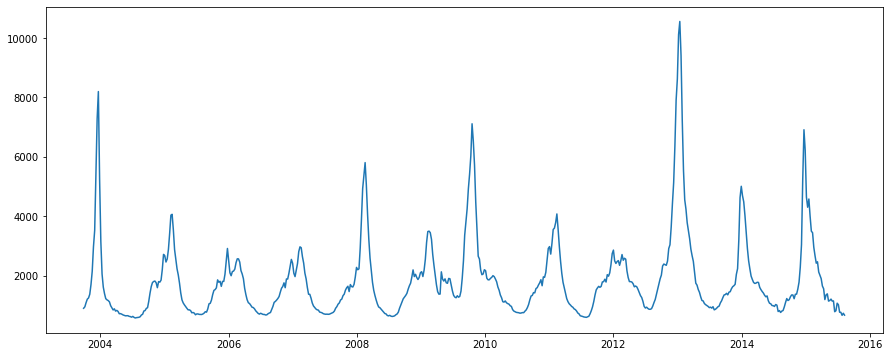

In [72]:
plt.plot(df_flu)

In [73]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['United States'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

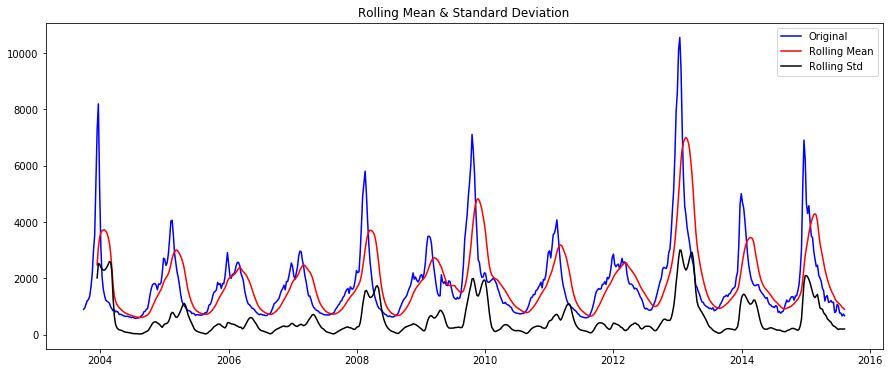

Results of Dickey-Fuller Test:
Test Statistic                -6.131843e+00
p-value                        8.365392e-08
#Lags Used                     6.000000e+00
Number of Observations Used    6.130000e+02
Critical Value (1%)           -3.441063e+00
Critical Value (5%)           -2.866266e+00
Critical Value (10%)          -2.569287e+00
dtype: float64


In [74]:
test_stationarity(df_flu)

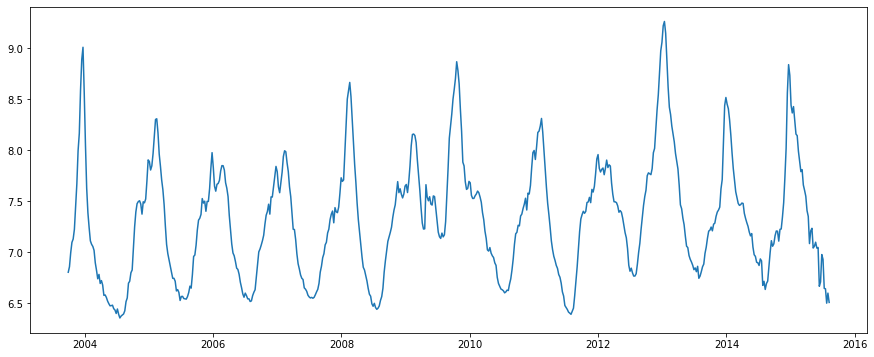

In [75]:
df_flu_log = np.log(df_flu)
plt.plot(df_flu_log)

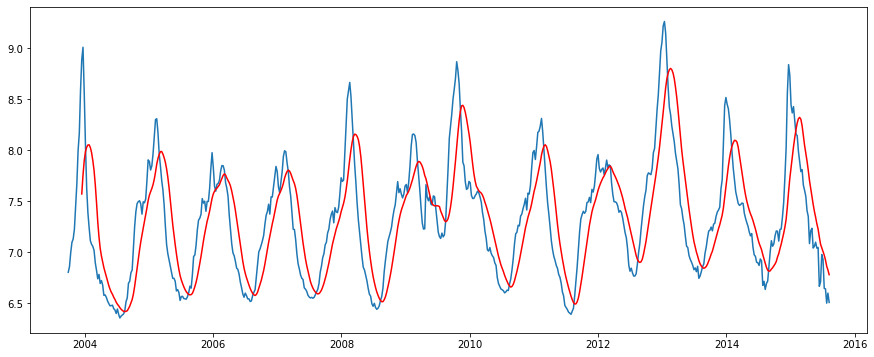

In [76]:
moving_avg = df_flu_log.rolling(window=12, center=False).mean()
plt.plot(df_flu_log)
plt.plot(moving_avg, color='red')

In [77]:
df_flu_log_moving_avg_diff = df_flu_log - moving_avg
df_flu_log_moving_avg_diff.head(12)

,United States
ds,
2003-09-28,NaN
2003-10-05,NaN
2003-10-12,NaN
2003-10-19,NaN
2003-10-26,NaN
2003-11-02,NaN
2003-11-09,NaN
2003-11-16,NaN
2003-11-23,NaN


In [78]:
df_flu_log_moving_avg_diff.dropna(inplace=True)
df_flu_log_moving_avg_diff.head()

,United States
ds,
2003-12-14,1.319722
2003-12-21,1.254888
2003-12-28,0.667185
2004-01-04,0.069240
2004-01-11,-0.402471


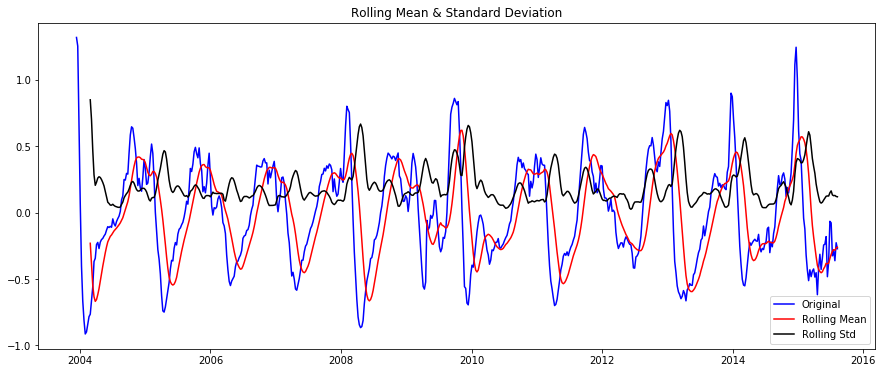

Results of Dickey-Fuller Test:
Test Statistic                -8.043311e+00
p-value                        1.822392e-12
#Lags Used                     1.900000e+01
Number of Observations Used    5.890000e+02
Critical Value (1%)           -3.441501e+00
Critical Value (5%)           -2.866460e+00
Critical Value (10%)          -2.569390e+00
dtype: float64


In [79]:
test_stationarity(df_flu_log_moving_avg_diff)

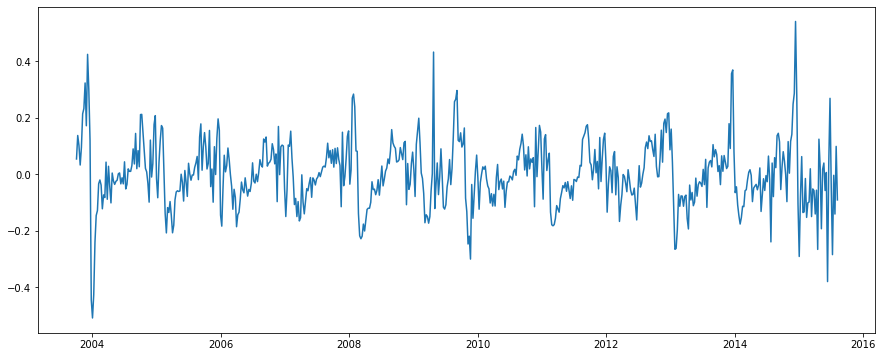

In [80]:
df_flu_log_diff = df_flu_log - df_flu_log.shift()
plt.plot(df_flu_log_diff)

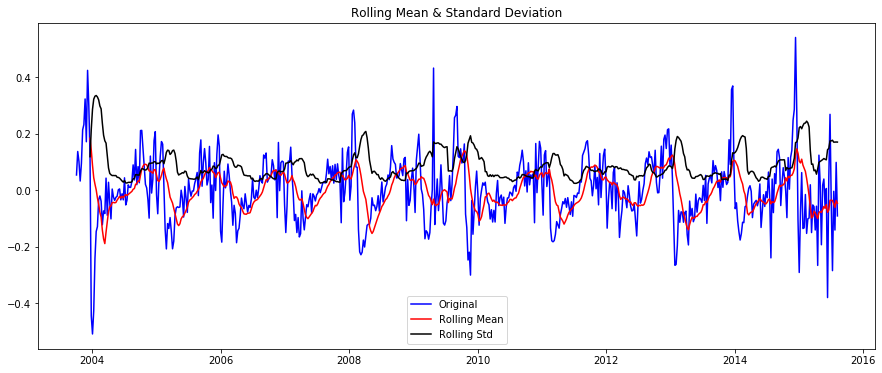

Results of Dickey-Fuller Test:
Test Statistic                -1.025839e+01
p-value                        4.300763e-18
#Lags Used                     1.000000e+00
Number of Observations Used    6.170000e+02
Critical Value (1%)           -3.440993e+00
Critical Value (5%)           -2.866236e+00
Critical Value (10%)          -2.569271e+00
dtype: float64


In [81]:
df_flu_log_diff.dropna(inplace=True)
test_stationarity(df_flu_log_diff)

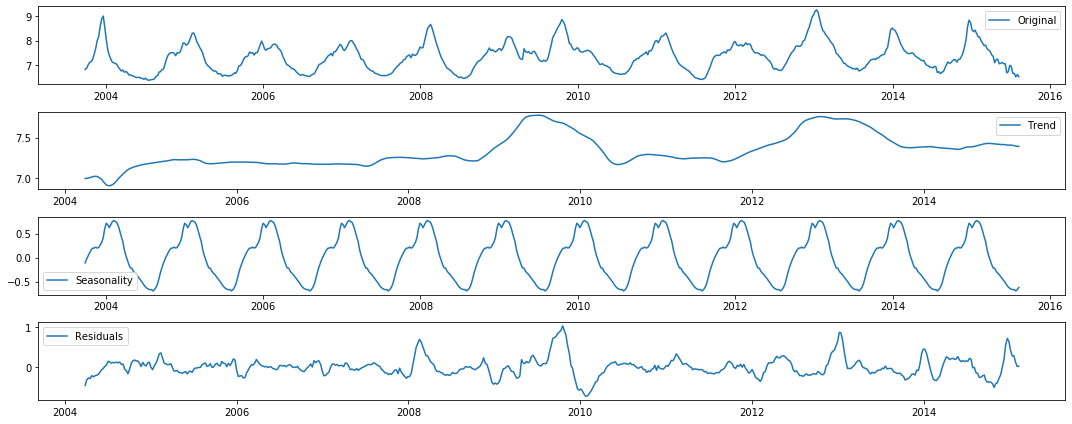

In [82]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_flu_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_flu_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

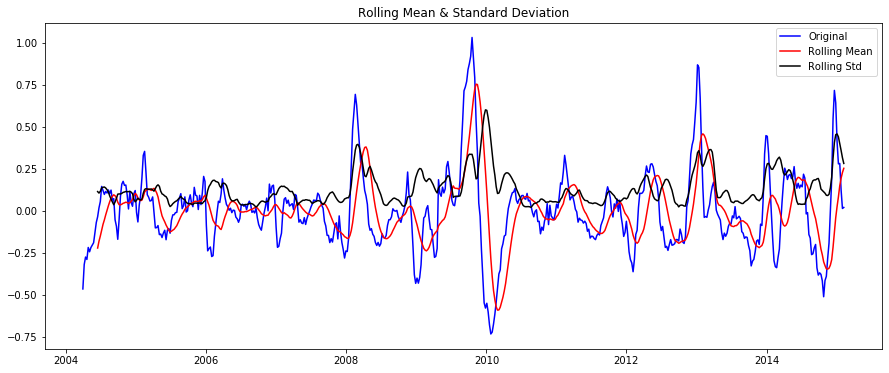

Results of Dickey-Fuller Test:
Test Statistic                -7.872095e+00
p-value                        4.953809e-12
#Lags Used                     2.000000e+00
Number of Observations Used    5.650000e+02
Critical Value (1%)           -3.441977e+00
Critical Value (5%)           -2.866669e+00
Critical Value (10%)          -2.569502e+00
dtype: float64


In [83]:
df_flu_log_decompose = residual
df_flu_log_decompose.dropna(inplace=True)
test_stationarity(df_flu_log_decompose)

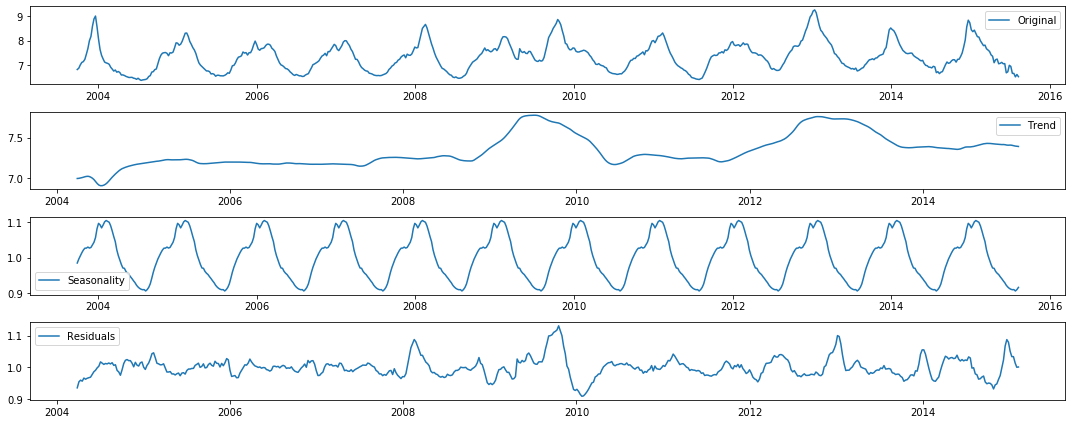

In [84]:
decomposition = seasonal_decompose(df_flu_log, model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_flu_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

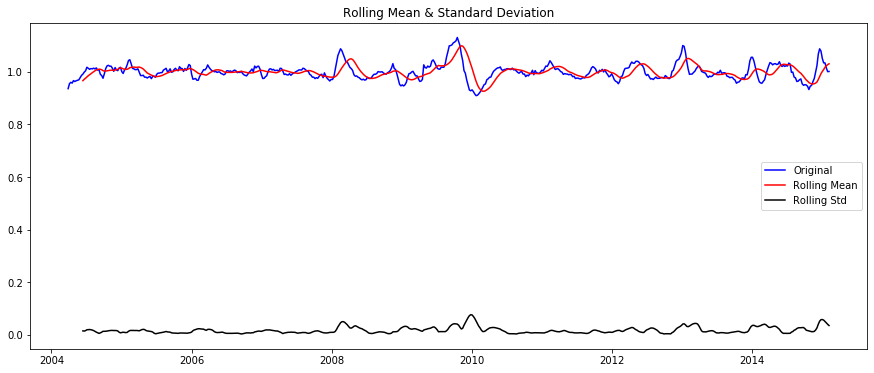

Results of Dickey-Fuller Test:
Test Statistic                -7.653598e+00
p-value                        1.762761e-11
#Lags Used                     2.000000e+00
Number of Observations Used    5.650000e+02
Critical Value (1%)           -3.441977e+00
Critical Value (5%)           -2.866669e+00
Critical Value (10%)          -2.569502e+00
dtype: float64


In [85]:
df_flu_log_decompose = residual
df_flu_log_decompose.dropna(inplace=True)
test_stationarity(df_flu_log_decompose)

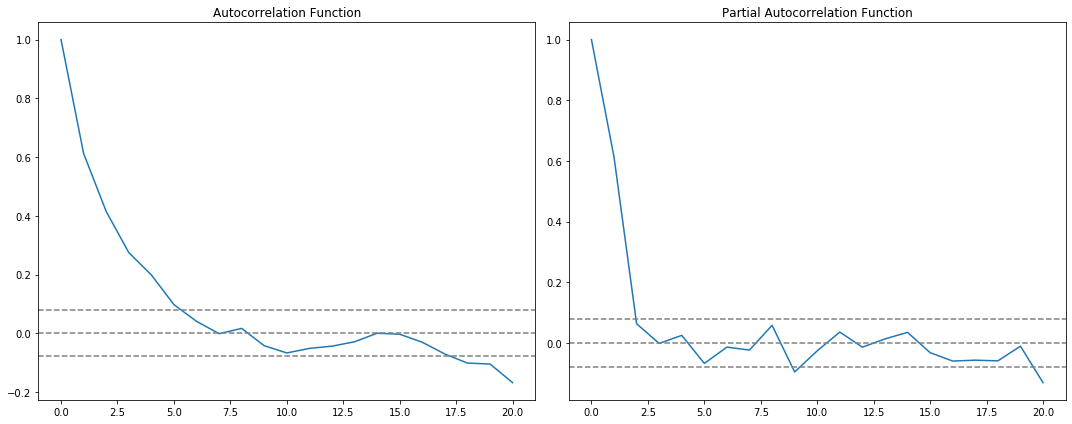

In [86]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(df_flu_log_diff, nlags=20)
lag_pacf = pacf(df_flu_log_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_flu_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_flu_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_flu_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_flu_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [87]:
from statsmodels.tsa.arima_model import ARIMA

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


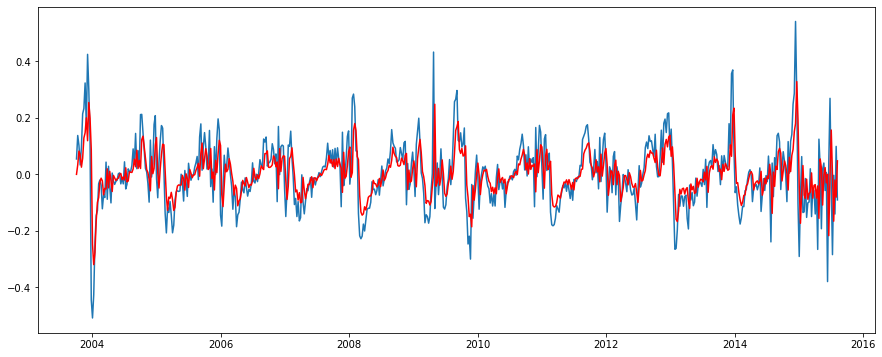

In [88]:
#MA model:
model = ARIMA(df_flu_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(df_flu_log_diff)
plt.plot(results_AR.fittedvalues, color='red')

In [99]:
df1=pd.concat([df_flu_log_diff, results_AR.fittedvalues], axis=1)
sum((df1.iloc[:,0]-df1.iloc[:,1])**2)/df.shape[0]

0.008341465807679723

In [95]:
sum((results_AR.fittedvalues-df_flu_log_diff)**2)

ValueError: Cannot add integral value to Timestamp without freq.

In [ ]:
results_AR.fittedvalues

In [ ]:
df_flu_log_diff

In [ ]:
model = ARIMA(df_flu_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(df_flu_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-df_flu_log_diff)**2))

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


ValueError: Cannot add integral value to Timestamp without freq.

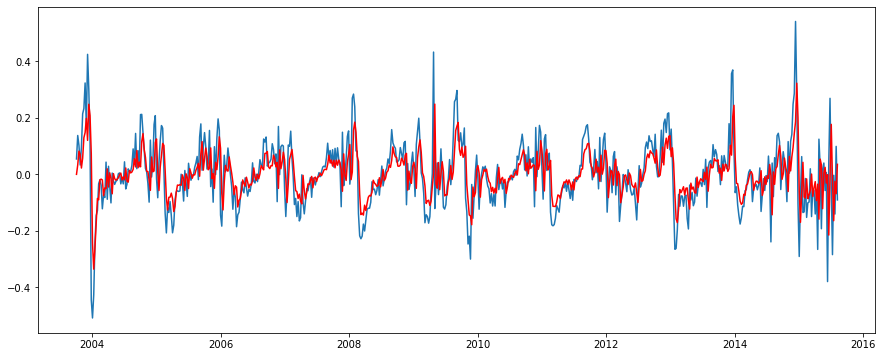

In [90]:
model = ARIMA(df_flu_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(df_flu_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-df_flu_log_diff)**2))